# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

city_df = pd.DataFrame(cities, columns = ["City"])

city_df["Cloudiness"] = ""
city_df["Country"] = ""
city_df["Date"] = ""
city_df["Humidity"] = ""
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Wind Speed"] = ""

city_df.head()


599


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tigre,,,,,,,,
1,albany,,,,,,,,
2,kodiak,,,,,,,,
3,hobart,,,,,,,,
4,azimur,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
print("Beginning Data Retrieval")
print("-----------------------------")
settings = {"units": "imperial", "appid": api_key}
set = 1
counter = 1
for index, row in city_df.iterrows():
    try:
        current_weather = owm.get_current(row["City"], **settings)
        time.sleep(1) 
        city = row["City"]
        print(f"Processing Record {counter} of Set {set} | {city}")
        row["Cloudiness"] = current_weather["clouds"]["all"]
        row["Country"] = current_weather["sys"]["country"]
        row["Date"] = current_weather["dt"]
        row["Humidity"] = current_weather["main"]["humidity"]
        row["Lat"] = current_weather["coord"]["lat"]
        row["Lng"] = current_weather["coord"]["lon"]
        row["Max Temp"] = current_weather["main"]["temp_max"]
        row["Wind Speed"] = current_weather["wind"]["speed"]
        counter = counter + 1
        if counter == 51:
            counter = 1
            set = set + 1
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tigre
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | hobart
City not found. Skipping...
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | rikitea
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | inongo
Processing Record 12 of Set 1 | jalu
Processing Record 13 of Set 1 | yar-sale
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | gravdal
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | yantal
Processing Record 22 of Set 1 | southbridge
Processing 

Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | palomares
Processing Record 39 of Set 4 | hervey bay
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | lac du bonnet
Processing Record 42 of Set 4 | emba
Processing Record 43 of Set 4 | jiaozuo
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | althofen
Processing Record 46 of Set 4 | caraballeda
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | baykit
Processing Record 50 of Set 4 | olinda
City not found. Skipping...
Processing Record 1 of Set 5 | san cristobal
Processing Record 2 of Set 5 | kutum
Processing Record 3 of Set 5 | kemin
Processing Record 4 of Set 5 | channel-port aux basques
Processing Record 5 of Set 5 | palauig
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | tamsalu
Processing Record 8 of Set 5 | severo-yeniseyskiy
City not found. Skipping...
Process

Processing Record 22 of Set 8 | faanui
Processing Record 23 of Set 8 | avera
Processing Record 24 of Set 8 | broome
Processing Record 25 of Set 8 | lorengau
City not found. Skipping...
Processing Record 26 of Set 8 | port augusta
Processing Record 27 of Set 8 | lagos
Processing Record 28 of Set 8 | fairview
City not found. Skipping...
Processing Record 29 of Set 8 | hoquiam
City not found. Skipping...
Processing Record 30 of Set 8 | makokou
Processing Record 31 of Set 8 | egvekinot
Processing Record 32 of Set 8 | ihosy
City not found. Skipping...
Processing Record 33 of Set 8 | clyde river
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | teguldet
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | nizhniy kuranakh
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | port-gentil
Processing Record 40 of Set 8 | belene
Processing Record 41 of Set 8 | nagua
Processing Record 42 of Set 8 | lompoc
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
city_df = city_df.dropna(how='any')
city_df.to_csv("Cities_Weather.csv")

city_df["Lat"] = pd.to_numeric(city_df["Lat"])
city_df["Max Temp"] = pd.to_numeric(city_df["Max Temp"])
city_df["Humidity"] = pd.to_numeric(city_df["Humidity"])
city_df["Cloudiness"] = pd.to_numeric(city_df["Cloudiness"])
city_df["Wind Speed"] = pd.to_numeric(city_df["Wind Speed"])
city_df.dtypes

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tigre,40.0,AR,1546365600,66.0,-34.42,-58.58,87.80,11.41
1,albany,90.0,US,1546365420,67.0,42.65,-73.75,39.92,16.11
2,kodiak,90.0,US,1546365300,84.0,39.95,-94.76,17.60,12.75
3,hobart,20.0,AU,1546365600,51.0,-42.88,147.33,59.00,9.17
5,hithadhoo,24.0,MV,1546367049,100.0,-0.60,73.08,82.55,7.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

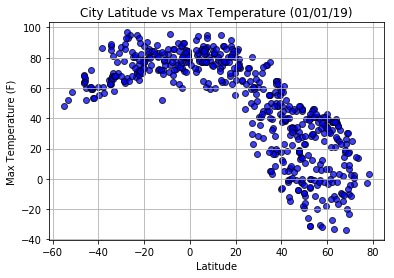

In [32]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs Max Temperature (01/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

plt.savefig("./Images/Latitude_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

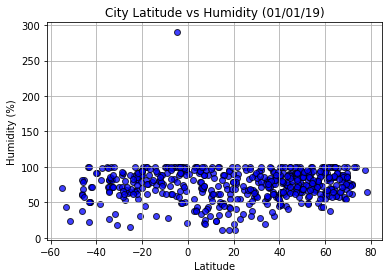

In [33]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs Humidity (01/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

plt.savefig("./Images/Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

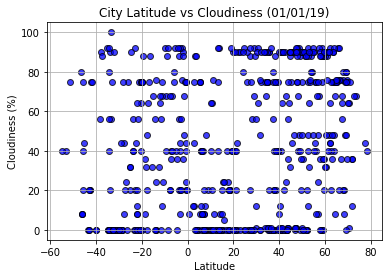

In [34]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs Cloudiness (01/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

plt.savefig("./Images/Latitude_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

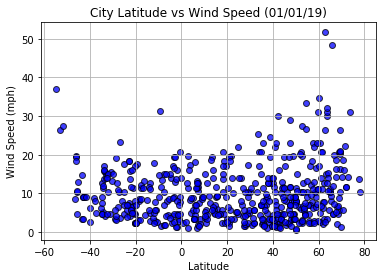

In [35]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs Wind Speed (01/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()

plt.savefig("./Images/Latitude_Wind Speed.png")

plt.show()